### 資料整理
參考他人 對一些極端和闕漏值得處裡
其實影響樣本量很少沒什麼意義 不過反正都寫了...

In [299]:
#Making necesarry imports
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os, sys
import re
import seaborn as sns

In [300]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [301]:
#Loading data
books = pd.read_csv('books.csv', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL','Book-Description']
users = pd.read_csv('users.csv', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('book_ratings_train.csv', error_bad_lines=False, encoding="latin-1")
ratings.columns = [ 'userID','ISBN', 'bookRating']

b'Skipping line 7842: expected 9 fields, saw 12\n'
b'Skipping line 70346: expected 9 fields, saw 14\n'
b'Skipping line 135984: expected 9 fields, saw 19\nSkipping line 189418: expected 9 fields, saw 16\n'
b'Skipping line 214386: expected 9 fields, saw 17\n'


In [302]:
#checking shapes of the datasets
print (books.shape)
print (users.shape)
print (ratings.shape)

(271380, 9)
(278858, 3)
(260202, 3)


In [303]:
#Exploring books dataset
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,Book-Description
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,"Featuring the authors' extensive, clear, and faithful translations of original sources, Classical Mythology, Seventh Edition, retells the myths and legends of Greece and Rome in a lucid and engaging style. Building on the best-selling tradition of previous editions, it incorporates a dynamic combination of poetic narratives and enlightening commentary to make classical myths come alive for students. The discussion covers comparative and interpretative approaches as well as evidence from art and archaeology. The authors also examine the enduring survival of classical mythology in the fields of art, literature, music, dance, and film. Classical Mythology, Seventh Edition, enables students to explore the fascinating nature of Greek and Roman gods, goddesses, heroes, and heroines and to appreciate the most significant ancient sources of classical legends and myths. The text is beautifully enhanced by over 150 illustrations, both in color and black and white. Classical Mythology, Seventh Edition features: * More extensive translations of works by the ancient authors: Selections by Greek authors include all thirty-three Homeric Hymns; the important passages in Hesiod's Theogony and Works and Days; and excerpts from Homer, Aeschylus, Sophocles, Euripides, Herodotus, Plato, Lucian, Pindar, the Pre-Socratic philosophers, and the Lyric poets. Works by Latin authors including Ovid, Vergil, Statius, Manilius, and Seneca are also provided. * An expanded art program: Sixty-six new illustrations--selected from both the ancient and the modern world--appear throughout the text and are accompanied by substantial and informative captions. Three new maps are also included. * Text boxes--incorporated for the first time--explore a variety of new topics and highlight interpretative approaches. * A selected bibliography is included for each chapter. * More explanatory material is integrated throughout, including a ""Glossary of Mythological Words and Phrases in English.The website has been revised to enhance the multifaceted subjects treated in the text and to provide links to numerous helpful resources."
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"The Values of Belonging breaks new ground by examining human value systems from the perspective of how we live, not our gender. ""There is a way of being in the world that recoils from aggressiveness, cunning, and greed,"" writes bestselling author Carol Lee Flinders. This way of being arose out of the relationships our hunter-gatherer ancestors had with the natural world, one another, and Spirit -- relationships that are most acutely understood in terms of trust, inclusion, and mutual reciprocity. This society's core values, which include intimate connection with the land, empathetic relationship with animals, self-restraint, balance, expressiveness, generosity, egalitarianism, playfulness, and nonviolent conflict resolution, are what Flinders calls the ""values of Belonging.""But with the Agricultural Revolution, as people took charge of what they could grow and where, the nature of human society changed, Once we could produce enough food to have surpluses, food could be bartered. The concept of ownership took on new meaning; more complex economies evolved, and with them came social and economic inequities. Qualities that had been reviled, such as competitiveness, acquisitiveness, and ambition, became under these new conditions the means 

In [304]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

In [305]:
#Now the books datasets looks like....
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Book-Description
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,"Featuring the authors' extensive, clear, and faithful translations of original sources, Classical Mythology, Seventh Edition, retells the myths and legends of Greece and Rome in a lucid and engaging style. Building on the best-selling tradition of previous editions, it incorporates a dynamic combination of poetic narratives and enlightening commentary to make classical myths come alive for students. The discussion covers comparative and interpretative approaches as well as evidence from art and archaeology. The authors also examine the enduring survival of classical mythology in the fields of art, literature, music, dance, and film. Classical Mythology, Seventh Edition, enables students to explore the fascinating nature of Greek and Roman gods, goddesses, heroes, and heroines and to appreciate the most significant ancient sources of classical legends and myths. The text is beautifully enhanced by over 150 illustrations, both in color and black and white. Classical Mythology, Seventh Edition features: * More extensive translations of works by the ancient authors: Selections by Greek authors include all thirty-three Homeric Hymns; the important passages in Hesiod's Theogony and Works and Days; and excerpts from Homer, Aeschylus, Sophocles, Euripides, Herodotus, Plato, Lucian, Pindar, the Pre-Socratic philosophers, and the Lyric poets. Works by Latin authors including Ovid, Vergil, Statius, Manilius, and Seneca are also provided. * An expanded art program: Sixty-six new illustrations--selected from both the ancient and the modern world--appear throughout the text and are accompanied by substantial and informative captions. Three new maps are also included. * Text boxes--incorporated for the first time--explore a variety of new topics and highlight interpretative approaches. * A selected bibliography is included for each chapter. * More explanatory material is integrated throughout, including a ""Glossary of Mythological Words and Phrases in English.The website has been revised to enhance the multifaceted subjects treated in the text and to provide links to numerous helpful resources."
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"The Values of Belonging breaks new ground by examining human value systems from the perspective of how we live, not our gender. ""There is a way of being in the world that recoils from aggressiveness, cunning, and greed,"" writes bestselling author Carol Lee Flinders. This way of being arose out of the relationships our hunter-gatherer ancestors had with the natural world, one another, and Spirit -- relationships that are most acutely understood in terms of trust, inclusion, and mutual reciprocity. This society's core values, which include intimate connection with the land, empathetic relationship with animals, self-restraint, balance, expressiveness, generosity, egalitarianism, playfulness, and nonviolent conflict resolution, are what Flinders calls the ""values of Belonging.""But with the Agricultural Revolution, as people took charge of what they could grow and where, the nature of human society changed, Once we could produce enough food to have surpluses, food could be bartered. The concept of ownership took on new meaning; more complex economies evolved, and with them came social and economic inequities. Qualities that had been reviled, such as competitiveness, acquisitiveness, and ambition, became under these new conditions the means to success. God underwent a transformation as well, becoming masculine, supreme, and finally located above and beyond us in the heavens. Flinders observes that these ""values of Enterprise"" have played a crucial role in the development of human society, having given us our passion for innovation and exploration of our world. But, whether negative or positive, the values of Enterprise, which b

In [306]:
#checking data types of columns
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
Book-Description     object
dtype: object

In [307]:
#making this setting to display full text in columns
pd.set_option('display.max_colwidth', -1)

**yearOfPublication**

In [308]:
#yearOfPublication should be set as having dtype as int
#checking the unique values of yearOfPublication
books.yearOfPublication.unique()

#as it can be seen from below that there are some incorrect entries in this field. It looks like Publisher names 
#'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file
#Also some of the entries are strings and same years have been entered as numbers in some places

array([2002.0, 2001.0, 1991.0, 1999.0, 2000.0, 1993.0, 1996.0, 1988.0,
       2004.0, 1998.0, 1994.0, 2003.0, 1997.0, 1983.0, 1979.0, 1995.0,
       1982.0, 1985.0, 1992.0, 1986.0, 1978.0, 1980.0, 1952.0, 1987.0,
       1990.0, 1981.0, 1989.0, 1984.0, 0.0, 1968.0, 1961.0, 1958.0,
       1974.0, 1976.0, 1971.0, 1977.0, 1975.0, 1965.0, 1941.0, 1970.0,
       1962.0, 1973.0, 1972.0, 1960.0, 1966.0, 1920.0, 1956.0, 1959.0,
       1953.0, 1951.0, 1942.0, 1963.0, 1964.0, 1969.0, 1954.0, 1950.0,
       1967.0, 2005.0, 1957.0, 1940.0, 1937.0, 1955.0, nan, 1946.0,
       1936.0, 1930.0, 2011.0, 1925.0, 1948.0, 1943.0, 1947.0, 1945.0,
       1923.0, 2020.0, 1939.0, 1926.0, 1938.0, 2030.0, 1911.0, 1904.0,
       1949.0, 1932.0, 1928.0, 1929.0, 1927.0, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, '0', '1975',
       '2002', '1992', '1993', '1996', '1995', '2003', '2001', '1997',
       '1986', '1999', '1988', '1987', '1985', '1981', '1994', '2000',
       '1

In [309]:
#Correcting the dtypes of yearOfPublication
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

In [310]:
sorted(books['yearOfPublication'].unique())
#Now it can be seen that yearOfPublication has all values as integers

[0.0,
 1376.0,
 1378.0,
 1806.0,
 1897.0,
 1900.0,
 1901.0,
 1902.0,
 1904.0,
 1906.0,
 1908.0,
 1909.0,
 1910.0,
 1911.0,
 1914.0,
 1917.0,
 1919.0,
 1920.0,
 1921.0,
 1922.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1955.0,
 nan,
 1935.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2008.0,
 2010.0,
 2011.0,
 2012.0,
 2020.0,
 2021.0,
 2024.0

In [311]:
#However, the value 0 is invalid and as this dataset was published in 2004, I have assumed the the years after 2006 to be 
#invalid keeping some margin in case dataset was updated thereafer
#setting invalid years as NaN
books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN

In [312]:
#replacing NaNs with mean value of yearOfPublication
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)

In [313]:
#rechecking
books.yearOfPublication.isnull().sum()
#No NaNs

0

In [314]:
#resetting the dtype as int32
books.yearOfPublication = books.yearOfPublication.astype(np.int32)

**publisher**

In [315]:
#exploring 'publisher' column
books.loc[books.publisher.isnull(),:]


#two NaNs

ISBN  \
7840    ï¿½ï¿½ï¿½ï¿½ï¿"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [316]:
books.bookAuthor.describe()

count     271377         
unique    102030         
top       Agatha Christie
freq      632            
Name: bookAuthor, dtype: object

In [317]:
#investigating rows having NaNs
#Checking with rows having bookTitle as Tyrant Moon to see if we can get any clues
books.loc[(books.bookTitle == 'Tyrant Moon'),:]
#no clues

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Book-Description
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,"It is the late Bronze Age of another world. Iron is unknown, only barbarians ride horses, and the stirrup will not be invented for centuries. To the north, the nomadic Skald roam the treeless steppes with their vast herds, while in the sub-tropical south the first dreams of Empire begin to be fulfilled. Thraxis was once the most powerful of the Athraskani wizards, before the rogue mage Balthazar cast a death curse upon him. Now any use of magic only speeds the progression of the curse that is devouring his life. The Arrow that Flies the Farthest was the Champion of her clan, until the coming of Balthazar plunged them into the madness of warfare. Her only hope of stopping the war lies with the dying Thraxis, who alone knows how to destroy the jewel that gives Balthazar his power. Together, Athraskani mage and barbarian warrior must begin an incredible journey that will take them from the civilized bounds of the Empire to the wild steppes of the Skald. But can a man sworn to do no harm and a woman born to kill find the common ground to defeat their enemybefore time runs out for them both?"


In [318]:
#Checking with rows having bookTitle as Finder Keepers to see if we can get any clues
books.loc[(books.bookTitle == 'Finders Keepers'),:]
#all rows with different publisher and bookAuthor

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Book-Description
10800,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books,"Growing up in a magnificent Charleston home, Jessie Rowland wants for nothing. Her rich, indulgent father has filled her room with expensive toys, but her frantically over-protective mother keeps her from having friends and never lets her out of her sight. As she grows into adulthood, her family's stifling possessiveness feeds her feelings of loss and isolation and fuels terrible nightmares from which she wakes screaming, night after night.\n\nAt nineteen, she makes her escape to Washington, D. C., where no one knows her and where, as assistant to a prominent Texas senator, she is soon swept into a whirlwind marriage to his handsome son. But as the Senator's career collapses in scandal, her marriage turns ugly and abusive, triggering again her strange dreams of lost happiness.\n\nFINDERS KEEPERS is Jessie's story -- the story of a child stolen from a loving home... of a woman lost in a life that is not her own... of a family shattered by an unspeakable crime. Jessie must rip the veil of every illusion before she can reclaim her life, and journey through a maze of heartbreak before she can find her way back to the place she can truly call home."
42020,70465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies,NaN
58267,688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books,NaN
66682,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation,"Growing up in a magnificent Charleston home, Jessie Rowland wants for nothing. Her rich, indulgent father has filled her room with expensive toys, but her frantically over-protective mother keeps her from having friends and never lets her out of her sight. As she grows into adulthood, her family's stifling possessiveness feeds her feelings of loss and isolation and fuels terrible nightmares from which she wakes screaming, night after night.\n\nAt nineteen, she makes her escape to Washington, D. C., where no one knows her and where, as assistant to a prominent Texas senator, she is soon swept into a whirlwind marriage to his handsome son. But as the Senator's career collapses in scandal, her marriage turns ugly and abusive, triggering again her strange dreams of lost happiness.\n\nFINDERS KEEPERS is Jessie's story -- the story of a child stolen from a loving home... of a woman lost in a life that is not her own . . .of a family shattered by an unspeakable crime. Jessie must rip the veil of every illusion before she can reclaim her life, and journey through a maze of heartbreak before she can find her way back to the place she can truly call home."
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,"Dumped, destitute and desperate. Captain Trilby Elliot's last chance at survival in the space lanes is to salvage a crashed fightercraft, and return its pilot for a reward.\n\nExcept for one small problem: the pilot, Rhis, is intent on commandeering her ship. And another much larger problem: someone very powerful wants Trilby Elliot dead."
134315,156309505,Finders Keepers,Will,1989,Voyager Books,NaN
173481,973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications,"Ever dreamed of winning the lottery? One of those massive, life-altering purses? Join Keith Whipple and his daughter Kate as they do just that, netting ten million dollars in a single-winner draw. Share in their excitement, the dreams that leap into their lives fully formed. But that kind of money, the heady sense of power it brings.do we control it? Or does it control us? Follow the Whipples and their ill-fated ticket on a roller coaster ride of greed, deception and murder, in a game where there can be only one winner."
195897,61083909,Finders Keepers,Sharon Sala,2003,HarperTorch,"\ The greatest of all loves... \ \ More than anything in the world, Molly Eden wants a child -- and then one day she finds one in her backyard! But this is 

In [319]:
#checking by bookAuthor to find patterns
books.loc[(books.bookAuthor == 'Elaine Corvidae'),:]
#all having different publisher...no clues here

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Book-Description
126768,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks,A slave-woman trying to work off her contract finds her life in danger when she makes mysterious things happen.
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,"It is the late Bronze Age of another world. Iron is unknown, only barbarians ride horses, and the stirrup will not be invented for centuries. To the north, the nomadic Skald roam the treeless steppes with their vast herds, while in the sub-tropical south the first dreams of Empire begin to be fulfilled. Thraxis was once the most powerful of the Athraskani wizards, before the rogue mage Balthazar cast a death curse upon him. Now any use of magic only speeds the progression of the curse that is devouring his life. The Arrow that Flies the Farthest was the Champion of her clan, until the coming of Balthazar plunged them into the madness of warfare. Her only hope of stopping the war lies with the dying Thraxis, who alone knows how to destroy the jewel that gives Balthazar his power. Together, Athraskani mage and barbarian warrior must begin an incredible journey that will take them from the civilized bounds of the Empire to the wild steppes of the Skald. But can a man sworn to do no harm and a woman born to kill find the common ground to defeat their enemybefore time runs out for them both?"
129007,759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory,Fantasy Romance: The story of a shape-changer and a human woman who must overcome their differences on the eve of war.


In [320]:
#checking by bookAuthor to find patterns
books.loc[(books.bookAuthor == 'Linnea Sinclair'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Book-Description
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,"Dumped, destitute and desperate. Captain Trilby Elliot's last chance at survival in the space lanes is to salvage a crashed fightercraft, and return its pilot for a reward.\n\nExcept for one small problem: the pilot, Rhis, is intent on commandeering her ship. And another much larger problem: someone very powerful wants Trilby Elliot dead."


In [321]:
#since there is nothing in common to infer publisher for NaNs, replacing these with 'other
books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

**Users**

In [322]:
print (users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,7c9fa136d4,"nyc, new york, usa",NaN
1,d86e8112f3,"stockton, california, usa",18.0
2,35be322d09,"moscow, yukon territory, russia",NaN
3,f0a0278e43,"porto, v.n.gaia, portugal",17.0
4,f13ee6ed54,"farnborough, hants, united kingdom",NaN


In [323]:
users.dtypes

userID      object 
Location    object 
Age         float64
dtype: object

**userID**

In [324]:
users.userID.values
#it can be seen that these are unique

array(['7c9fa136d4', 'd86e8112f3', '35be322d09', ..., '525b74f9cf',
       '1fe052a9d0', '514d852b64'], dtype=object)

**Location**

In [325]:
users.Location.head()

0    nyc, new york, usa                
1    stockton, california, usa         
2    moscow, yukon territory, russia   
3    porto, v.n.gaia, portugal         
4    farnborough, hants, united kingdom
Name: Location, dtype: object

In [423]:
users = pd.read_csv('users.csv', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age'] 
users['Country'] = users['Location'].str.split(',').str[2]
users.loc[(users.Country==' n/a')|(users.Country==' x')|(users.Country==' n/a - on the road')|
          (users.Country==' far away...')|(users.Country==' &#20013;&#22269;')|(users.Country==' \"n/a\""')|
          (users.Country=='"')|(users.Country==' ```n/a``')|(users.Country==' \n/a\"')|
          (users.Country==' *'),'Country']=' '
users.loc[(users.Country ==' austria"')|(users.Country=='austria'),'Country']=' austria'
users.loc[users.Country ==' spain"','Country']=' spain'
users.loc[(users.Country ==' italia')|(users.Country==' italy'),'Country']=' italy'
users.loc[users.Country ==' portugal"','Country']=' portugal'
users.loc[users.Country ==' switzerland"','Country']=' switzerland'
users.loc[(users.Country ==' united kingdom"')|(users.Country==' united kindgom')|
          (users.Country==' u.k.')|(users.Country==' england'),'Country']=' united kingdom'
users.loc[(users.Country ==' us')|(users.Country==' us>')|(users.Country==' u.s.a.')|(users.Country==' u.s. of a.')|
          (users.Country==' united state')|(users.Country==' united states')|(users.Country==' united states of america'),'Country']=' usa'
users.loc[users.Country ==' netherlands"','Country']=' netherlands'
users.loc[users.Country ==' new zealand"','Country']=' new zealand'
users.loc[users.Country ==' germany"','Country']=' germany'
users.loc[users.Country ==' cananda"','Country']=' canada'
users.loc[users.Country ==' france"','Country']=' france'
users.loc[users.Country ==' denmark"','Country']=' denmark'
users.loc[users.Country ==' greece"','Country']=' greece'
users.loc[users.Country ==' _ brasil','Country']=' brazil'
users.loc[users.Country ==' ireland"','Country']=' ireland'
users.loc[users.Country ==' norway"','Country']=' norway'
users.loc[(users.Country =='  philippines"')|(users.Country==' phillipines'),'Country']=' philippines'
users.loc[users.Country ==' sweden"','Country']=' sweden'
countryCount=users.groupby('Country')['Country'].agg(['count'])
countryCount['Country']=countryCount.index
users=users.merge(countryCount,left_on='Country',right_on='Country',how='left')
users.count=users["count"].astype(np.float64)
users.loc[users.count<60 ,'Country']=' others'
users.drop(['count'],axis=1,inplace=True)
#userImpMeanRate=imp_ratings.groupby('userID')['bookRating'].agg(['mean','std','count'])
#userImpMeanRate.drop(['mean', 'std'],axis=1,inplace=True)
#userImpMeanRate.columns = [ 'NumOfImp']
#userImpMeanRate.head()
#new_users=new_users.merge(userImpMeanRate,left_on='userID',right_on='userID',how='left')
#users = pd.get_dummies(users, columns=['Country'])

In [424]:
countryCount.head(n=500)

,count,Country
Country,,
,4598,
,119,
australia,1,australia
england,1,england
pasig city.,1,pasig city.
&#32654;&#22269;,1,&#32654;&#22269;
-,1,-
-------,1,-------
.,2,.


In [434]:
pd.options.display.max_rows = 50
users.groupby('Country')['Country'].agg(['count'])

,count
Country,
,4598
,119
argentina,1076
australia,11723
austria,1147
belgium,816
brazil,1672
bulgaria,133
california,64


**Age**

In [329]:
print (sorted(users.Age.unique()))
#Age column has some invalid entries like nan, 0 and very high values like 100 and above

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [330]:
#In my view values below 5 and above 90 do not make much sense for our book rating case...hence replacing these by NaNs
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

In [331]:
# Create the age group
users['AgeGroup']=''
users.loc[(users.Age <=20) , 'AgeGroup'] = 'below20'
users.loc[(users.Age >20) & (users.Age<=30) , 'AgeGroup'] = '21~30'
users.loc[(users.Age >30) & (users.Age<=40) , 'AgeGroup'] = '31~40'
users.loc[(users.Age >40) & (users.Age<=50) , 'AgeGroup'] = '41~50'
users.loc[(users.Age >50) & (users.Age<=60) , 'AgeGroup'] = '51~60'
users.loc[(users.Age >60) & (users.Age<=70) , 'AgeGroup'] = '61~70'
users.loc[(users.Age >70) & (users.Age<=80) , 'AgeGroup'] = '71~80'
users.loc[(users.Age >80) , 'AgeGroup'] = '80up'
users.loc[(users.AgeGroup=='') , 'AgeGroup'] = 'unknown'
users = pd.get_dummies(users, columns=['AgeGroup'])

In [332]:
users.head()

,userID,Location,Age,Country_,Country_,Country_ argentina,Country_ australia,Country_ austria,Country_ belgium,Country_ brazil,...,Country_ yugoslavia,AgeGroup_21~30,AgeGroup_31~40,AgeGroup_41~50,AgeGroup_51~60,AgeGroup_61~70,AgeGroup_71~80,AgeGroup_80up,AgeGroup_below20,AgeGroup_unknown
0,7c9fa136d4,"nyc, new york, usa",NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,d86e8112f3,"stockton, california, usa",18.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,35be322d09,"moscow, yukon territory, russia",NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,f0a0278e43,"porto, v.n.gaia, portugal",17.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,f13ee6ed54,"farnborough, hants, united kingdom",NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [333]:
#replacing NaNs with mean
users.Age = users.Age.fillna(users.Age.mean())

In [334]:
#setting the data type as int
users.Age = users.Age.astype(np.int32)

In [335]:
#rechecking
print (sorted(users.Age.unique()))
#looks good now

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [336]:
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Book-Description
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,"Featuring the authors' extensive, clear, and faithful translations of original sources, Classical Mythology, Seventh Edition, retells the myths and legends of Greece and Rome in a lucid and engaging style. Building on the best-selling tradition of previous editions, it incorporates a dynamic combination of poetic narratives and enlightening commentary to make classical myths come alive for students. The discussion covers comparative and interpretative approaches as well as evidence from art and archaeology. The authors also examine the enduring survival of classical mythology in the fields of art, literature, music, dance, and film. Classical Mythology, Seventh Edition, enables students to explore the fascinating nature of Greek and Roman gods, goddesses, heroes, and heroines and to appreciate the most significant ancient sources of classical legends and myths. The text is beautifully enhanced by over 150 illustrations, both in color and black and white. Classical Mythology, Seventh Edition features: * More extensive translations of works by the ancient authors: Selections by Greek authors include all thirty-three Homeric Hymns; the important passages in Hesiod's Theogony and Works and Days; and excerpts from Homer, Aeschylus, Sophocles, Euripides, Herodotus, Plato, Lucian, Pindar, the Pre-Socratic philosophers, and the Lyric poets. Works by Latin authors including Ovid, Vergil, Statius, Manilius, and Seneca are also provided. * An expanded art program: Sixty-six new illustrations--selected from both the ancient and the modern world--appear throughout the text and are accompanied by substantial and informative captions. Three new maps are also included. * Text boxes--incorporated for the first time--explore a variety of new topics and highlight interpretative approaches. * A selected bibliography is included for each chapter. * More explanatory material is integrated throughout, including a ""Glossary of Mythological Words and Phrases in English.The website has been revised to enhance the multifaceted subjects treated in the text and to provide links to numerous helpful resources."
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"The Values of Belonging breaks new ground by examining human value systems from the perspective of how we live, not our gender. ""There is a way of being in the world that recoils from aggressiveness, cunning, and greed,"" writes bestselling author Carol Lee Flinders. This way of being arose out of the relationships our hunter-gatherer ancestors had with the natural world, one another, and Spirit -- relationships that are most acutely understood in terms of trust, inclusion, and mutual reciprocity. This society's core values, which include intimate connection with the land, empathetic relationship with animals, self-restraint, balance, expressiveness, generosity, egalitarianism, playfulness, and nonviolent conflict resolution, are what Flinders calls the ""values of Belonging.""But with the Agricultural Revolution, as people took charge of what they could grow and where, the nature of human society changed, Once we could produce enough food to have surpluses, food could be bartered. The concept of ownership took on new meaning; more complex economies evolved, and with them came social and economic inequities. Qualities that had been reviled, such as competitiveness, acquisitiveness, and ambition, became under these new conditions the means to success. God underwent a transformation as well, becoming masculine, supreme, and finally located above and beyond us in the heavens. Flinders observes that these ""values of Enterprise"" have played a crucial role in the development of human society, having given us our passion for innovation and exploration of our world. But, whether negative or positive, the values of Enterprise, which b

**Ratings Dataset**

In [337]:
#checking shape
ratings = pd.read_csv('book_ratings_train.csv', error_bad_lines=False, encoding="latin-1")
ratings.columns = [ 'userID','ISBN', 'bookRating']
ratings.shape

(260202, 3)

In [338]:
#ratings dataset will have n_users*n_books entries if every user rated every item, this shows that the dataset is very sparse
n_users = users.shape[0]
n_books = books.shape[0]
print (n_users * n_books)

75676484040


In [339]:
#checking first few rows...
ratings.head(5)

,userID,ISBN,bookRating
0,153d612c88,1550372289,8
1,f73f18a13a,030796017X,10
2,02e87fe603,014028009,8
3,be36e5b8cb,0345413350,10
4,98ec1c54b5,0609600788,9


In [340]:
ratings.bookRating.unique()

array([ 8, 10,  9,  6,  7,  5,  3,  4,  1,  2])

In [341]:
#ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset
#ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new = ratings

In [342]:
print (ratings.shape)
print (ratings_new.shape)
#it can be seen that many rows having book ISBN not part of books dataset got dropped off

(260202, 3)
(260202, 3)


In [343]:
#ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset
ratings = ratings[ratings.userID.isin(users.userID)]

In [344]:
print (ratings.shape)
print (ratings_new.shape)
#no new users added, hence we will go with above dataset ratings_new (1031136, 3)

(260202, 3)
(260202, 3)


In [345]:
print ("number of users: " + str(n_users))
print ("number of books: " + str(n_books))

number of users: 278858
number of books: 271380


In [346]:
#Sparsity of dataset in %
sparsity=1.0-len(ratings_new)/float(n_users*n_books)
sparsity

0.9999965616531569

In [347]:
#As quoted in the description of the dataset -
#BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 
#higher values denoting higher appreciation, or implicit, expressed by 0
ratings.bookRating.unique()

array([ 8, 10,  9,  6,  7,  5,  3,  4,  1,  2])

In [348]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

In [349]:
#checking shapes
print (ratings_new.shape)
print (ratings_explicit.shape)
print (ratings_implicit.shape)

(260202, 3)
(260202, 3)
(0, 3)


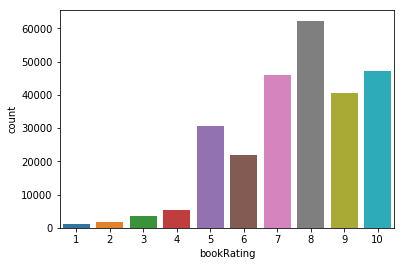

,bookRating
count,260202.000000
mean,7.601225
std,1.844150
min,1.000000
25%,7.000000
50%,8.000000
75%,9.000000
max,10.000000


In [350]:
#plotting count of bookRating
sns.countplot(data=ratings_explicit , x='bookRating')
plt.show()
#It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times

ratings_explicit.describe()

**Simple Popularity Based Recommendation System**

In [351]:
#At this point , a simple popularity based recommendation system can be built based on count of user ratings for different books
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['bookRating'].sum())
top10 = ratings_count.sort_values('bookRating', ascending = False).head(10)
print ("Following books are recommended")
top10.merge(books, left_index = True, right_on = 'ISBN')

#Given below are top 10 recommendations based on popularity. It is evident that books authored by J.K. Rowling are most popular

Following books are recommended


,bookRating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Book-Description
2143,1674,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books,"Harry Potter has never played a sport while flying on a broomstick. He's never worn a cloak of invisibility, befriended a giant, or helped hatch a dragon. All Harry knows is a miserable life with the Dursleys, his horrible aunt and uncle, and their abominable son, Dudley. Harry's room is a tiny closet at the foot of the stairs, and he hasn't had a birthday party in eleven years.\n\nBut all that is about to change when a mysterious letter arrives by owl messenger: a letter with an invitation to a wonderful place he never dreamed existed. There he finds not only friends, aerial sports, and magic around every corner, but a great destiny that's been waiting for him ... if Harry can survive the encounter.\n\nAlso published as Harry Potter and the Philosopher's Stone"


In [352]:
#Similarly segregating users who have given explicit ratings from 1-10 and those whose implicit behavior was tracked
users_exp_ratings = users[users.userID.isin(ratings_explicit.userID)]
users_imp_ratings = users[users.userID.isin(ratings_implicit.userID)]

### My model
輸入資料的處裡

In [353]:
imp_ratings = pd.read_csv('implicit_ratings.csv', error_bad_lines=False, encoding="latin-1")
imp_ratings.columns = [ 'bookRating','ISBN','userID']

In [354]:
imp_ratings.head()

,bookRating,ISBN,userID
0,0,034545104X,fbc29e3770
1,0,0446520802,463239d66b
2,0,2080674722,f9d4af8af0
3,0,0425115801,a75c70fcc0
4,0,0449006522,a75c70fcc0


In [355]:
test_data = pd.read_csv('book_ratings_test.csv', error_bad_lines=False, encoding="latin-1")
test_data.columns = ['userID','ISBN']

In [356]:
print (test_data.shape)
test_data.head()

(173469, 2)


,userID,ISBN
0,27b250f951,1560232234
1,23eaeeebcf,0156027321
2,cf504ef35f,0761526544
3,4bddaabbca,0451169514
4,d630830673,0070329559


In [357]:
test_new = test_data[test_data.ISBN.isin(books.ISBN)]

In [358]:
test_new.shape

(32235, 2)

In [359]:
a =  test_data.ISBN.isin(books.ISBN)
b= [not c for c in a]

test_new2 = test_data[b]
test_new2.shape

(141234, 2)

In [360]:
bookMeanRate=ratings_explicit.groupby('ISBN')['bookRating'].agg(['mean','std','count'])

In [361]:
userMeanRate=ratings_explicit.groupby('userID')['bookRating'].agg(['mean','std','count'])

In [362]:
userImpMeanRate=imp_ratings.groupby('userID')['bookRating'].agg(['mean','std','count'])
userImpMeanRate.drop(['mean', 'std'],axis=1,inplace=True)
userImpMeanRate.columns = [ 'NumOfImp']
userImpMeanRate.head()

,NumOfImp
userID,
00005ca705,2
0000f10801,1
00046a5b8f,1
00071aec8f,1
0008ca6925,3


In [363]:
bookImpMeanRate=imp_ratings.groupby('ISBN')['bookRating'].agg(['mean','std','count'])

In [364]:
bookImpMeanRate=imp_ratings.groupby('ISBN')['bookRating'].agg(['mean','std','count'])
bookImpMeanRate.drop(['mean', 'std'],axis=1,inplace=True)
bookImpMeanRate.columns = [ 'NumOfImp']
bookImpMeanRate.head()

,NumOfImp
ISBN,
0330299891,1
0375404120,1
0586045007,1
9022906116,1
9032803328,1


In [365]:
ratings_explicit.shape

(260202, 3)

In [366]:
userMeanRate['userID']=userMeanRate.index
userMeanRate.head()

,mean,std,count,userID
userID,,,,
000172c181,9.0,NaN,1,000172c181
0002609ef3,6.0,NaN,1,0002609ef3
00034b68bc,7.0,NaN,1,00034b68bc
0003768e59,4.0,NaN,1,0003768e59
0004f7f0f9,7.0,1.414214,2,0004f7f0f9


In [367]:
bookMeanRate['ISBN']=bookMeanRate.index
bookMeanRate.head()

,mean,std,count,ISBN
ISBN,,,,
0330299891,6.0,NaN,1,0330299891
#6612432,5.0,NaN,1,#6612432
'9607092910',10.0,NaN,1,'9607092910'
)416195113,8.0,NaN,1,)416195113
)452273056,8.0,NaN,1,)452273056


In [368]:
userImpMeanRate['userID']=userImpMeanRate.index
userImpMeanRate.head()

,NumOfImp,userID
userID,,
00005ca705,2,00005ca705
0000f10801,1,0000f10801
00046a5b8f,1,00046a5b8f
00071aec8f,1,00071aec8f
0008ca6925,3,0008ca6925


In [369]:
bookImpMeanRate['ISBN']=bookImpMeanRate.index
bookImpMeanRate.head()

,NumOfImp,ISBN
ISBN,,
0330299891,1,0330299891
0375404120,1,0375404120
0586045007,1,0586045007
9022906116,1,9022906116
9032803328,1,9032803328


In [370]:
new_users=users.merge(userMeanRate,left_on='userID',right_on='userID',how='left')

In [371]:
new_books=books.merge(bookMeanRate,left_on='ISBN',right_on='ISBN',how='left')

In [372]:
new_users=new_users.merge(userImpMeanRate,left_on='userID',right_on='userID',how='left')

In [373]:
new_books=new_books.merge(bookImpMeanRate,left_on='ISBN',right_on='ISBN',how='left')

In [374]:
books_updated = pd.read_csv('books_final.csv', error_bad_lines=False, encoding="latin-1")
books_updated.drop(['Unnamed: 0', 'publisher'],axis=1,inplace=True)
books_updated.rename(columns={'yearOfPublication': 'YearPubNew', 'decriptionLen': 'DecrLenNew'}, inplace=True)
books_updated['form'] = books_updated.form.replace(np.NaN, 'unknown')
books_updated['shelve1'] = books_updated.shelve1.replace(np.NaN, 'unknown')
books_updated=books_updated.drop_duplicates(['ISBN'], keep='first')
new_books=new_books.merge(books_updated,left_on='ISBN',right_on='ISBN',how='left')
#new_books.loc[(new_books.yearOfPublication==np.NaN) | (new_books.yearOfPublication==None), 'yearOfPublication'] = new_books.YearPubNew
#new_books.loc[(new_books.yearOfPublication==np.NaN) | (new_books.yearOfPublication==''), 'yearOfPublication'] = new_books.YearPubNew
#users.loc[(users.Age >20) & (users.Age<=30) , 'AgeGroup'] = '21~30'

In [375]:
#new_books.drop(['Book-Description'],axis=1,inplace=True)
books_updated.head()

,ISBN,average_rating,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,form,num_pages,shelve1,YearPubNew,DecrLenNew
0,1560232234,3.67,42.0,69.0,2.0,42.0,70.0,2.0,unknown,NaN,fiction,2001.0,NaN
1,0156027321,3.89,30926.0,47079.0,4360.0,1122366.0,1682774.0,44305.0,Paperback,331.0,fiction,2003.0,106.0
2,0761526544,4.00,2.0,6.0,0.0,2.0,6.0,0.0,Paperback,96.0,unknown,2000.0,32.0
3,0451169514,4.21,294574.0,402141.0,6565.0,582788.0,960077.0,17255.0,Paperback,1090.0,horror,1997.0,283.0
4,0070329559,3.15,13.0,26.0,0.0,13.0,26.0,0.0,Paperback,144.0,unknown,1998.0,55.0


In [376]:
description_words=new_books['Book-Description'].str.split()
description_words = pd.DataFrame(description_words)
description_words.head()

,Book-Description
0,"[Featuring, the, authors', extensive,, clear,, and, faithful, translations, of, original, sources,, Classical, Mythology,, Seventh, Edition,, retells, the, myths, and, legends, of, Greece, and, Rome, in, a, lucid, and, engaging, style., Building, on, the, best-selling, tradition, of, previous, editions,, it, incorporates, a, dynamic, combination, of, poetic, narratives, and, enlightening, commentary, to, make, classical, myths, come, alive, for, students., The, discussion, covers, comparative, and, interpretative, approaches, as, well, as, evidence, from, art, and, archaeology., The, authors, also, examine, the, enduring, survival, of, classical, mythology, in, the, fields, of, art,, literature,, music,, dance,, and, film., Classical, Mythology,, Seventh, Edition,, enables, students, to, explore, ...]"
1,"[The, Values, of, Belonging, breaks, new, ground, by, examining, human, value, systems, from, the, perspective, of, how, we, live,, not, our, gender., ""There, is, a, way, of, being, in, the, world, that, recoils, from, aggressiveness,, cunning,, and, greed,"", writes, bestselling, author, Carol, Lee, Flinders., This, way, of, being, arose, out, of, the, relationships, our, hunter-gatherer, ancestors, had, with, the, natural, world,, one, another,, and, Spirit, --, relationships, that, are, most, acutely, understood, in, terms, of, trust,, inclusion,, and, mutual, reciprocity., This, society's, core, values,, which, include, intimate, connection, with, the, land,, empathetic, relationship, with, animals,, self-restraint,, balance,, expressiveness,, generosity,, egalitarianism,, ...]"
2,"[A, splendid, and, unsparing, review, of, the, Normandy, campaign, from, the, planning, stages, to, the, break, out, at, the, Falaise, Gap.]"
3,"[The, fascinating,, true, story, of, the, world's, deadliest, disease., \, In, 1918,, the, Great, Flu, Epidemic, felled, the, young, and, healthy, virtually, overnight., An, estimated, forty, million, people, died, as, the, epidemic, raged., Children, were, left, orphaned, and, families, were, devastated., As, many, American, soldiers, were, killed, by, the, 1918, flu, as, were, killed, in, battle, during, World, War, I., And, no, area, of, the, globe, was, safe., Eskimos, living, in, remote, outposts, in, the, frozen, tundra, were, sickened, and, killed, by, the, flu, in, such, numbers, that, entire, villages, were, wiped, out., Scientists, have, recently, rediscovered, shards, of, the, ...]"
4,"[A, fascinating, exploration, of, the, mysterious,, perfectly, preserved, Caucasian, mummies, of, western, China., In, the, museums, of, rmchi,, the, windswept, regional, capital, of, the, Uyghur, Autonomous, Region, in, Western, China-what, we, know, as, Chinese, Turkestan-a, collection, of, ancient, mummies, lay, at, the, center, of, an, enormous, mystery., Some, of, rmchi's, mummies, date, back, as, far, as, 4,000, years-contemporary, to, the, famous, Egyptian, mummies,, but, even, more, beautifully, preserved,, especially, their, clothing., Surprisingly,, these, prehistoric, people, are, not, Oriental, but, Caucasian-tall, and, large-nosed, and, blond, with, round, eyes, (probably, blue)., Where, did, they, come, from?, What, were, these, blonds, doing, in, ...]"


In [377]:
new_books['decriptionLen']=description_words['Book-Description'].str.len()

In [378]:
# update the data
new_books.loc[(new_books.yearOfPublication==np.NaN) | (new_books.yearOfPublication==None), 'yearOfPublication'] = new_books.YearPubNew
new_books.loc[new_books.decriptionLen==np.NaN, 'decriptionLen'] = new_books.DecrLenNew
new_books.drop(['YearPubNew', 'DecrLenNew'],axis=1,inplace=True)
new_books = pd.get_dummies(new_books, columns=['form'])
new_books = pd.get_dummies(new_books, columns=['shelve1'])
#users.loc[(users.Age >20) & (users.Age<=30) , 'AgeGroup'] = '21~30'

In [379]:
new_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271380 entries, 0 to 271379
Data columns (total 93 columns):
ISBN                                           271380 non-null object
bookTitle                                      271377 non-null object
bookAuthor                                     271377 non-null object
yearOfPublication                              271380 non-null float64
publisher                                      271376 non-null object
Book-Description                               184903 non-null object
mean                                           28322 non-null float64
std                                            6645 non-null float64
count                                          28322 non-null float64
NumOfImp                                       48112 non-null float64
average_rating                                 39100 non-null float64
ratings_count                                  39100 non-null float64
reviews_count                                  39

In [380]:
ratings_explicit.head()

,userID,ISBN,bookRating
0,153d612c88,1550372289,8
1,f73f18a13a,030796017X,10
2,02e87fe603,014028009,8
3,be36e5b8cb,0345413350,10
4,98ec1c54b5,0609600788,9


In [381]:
new_books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Book-Description,mean,std,count,NumOfImp,...,shelve1_favorites,shelve1_fiction,shelve1_historical-fiction,shelve1_horror,shelve1_mystery,shelve1_non-fiction,shelve1_romance,shelve1_science-fiction,shelve1_unknown,shelve1_young-adult
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,"Featuring the authors' extensive, clear, and faithful translations of original sources, Classical Mythology, Seventh Edition, retells the myths and legends of Greece and Rome in a lucid and engaging style. Building on the best-selling tradition of previous editions, it incorporates a dynamic combination of poetic narratives and enlightening commentary to make classical myths come alive for students. The discussion covers comparative and interpretative approaches as well as evidence from art and archaeology. The authors also examine the enduring survival of classical mythology in the fields of art, literature, music, dance, and film. Classical Mythology, Seventh Edition, enables students to explore the fascinating nature of Greek and Roman gods, goddesses, heroes, and heroines and to appreciate the most significant ancient sources of classical legends and myths. The text is beautifully enhanced by over 150 illustrations, both in color and black and white. Classical Mythology, Seventh Edition features: * More extensive translations of works by the ancient authors: Selections by Greek authors include all thirty-three Homeric Hymns; the important passages in Hesiod's Theogony and Works and Days; and excerpts from Homer, Aeschylus, Sophocles, Euripides, Herodotus, Plato, Lucian, Pindar, the Pre-Socratic philosophers, and the Lyric poets. Works by Latin authors including Ovid, Vergil, Statius, Manilius, and Seneca are also provided. * An expanded art program: Sixty-six new illustrations--selected from both the ancient and the modern world--appear throughout the text and are accompanied by substantial and informative captions. Three new maps are also included. * Text boxes--incorporated for the first time--explore a variety of new topics and highlight interpretative approaches. * A selected bibliography is included for each chapter. * More explanatory material is integrated throughout, including a ""Glossary of Mythological Words and Phrases in English.The website has been revised to enhance the multifaceted subjects treated in the text and to provide links to numerous helpful resources.",NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"The Values of Belonging breaks new ground by examining human value systems from the perspective of how we live, not our gender. ""There is a way of being in the world that recoils from aggressiveness, cunning, and greed,"" writes bestselling author Carol Lee Flinders. This way of being arose out of the relationships our hunter-gatherer ancestors had with the natural world, one another, and Spirit -- relationships that are most acutely understood in terms of trust, inclusion, and mutual reciprocity. This society's core values, which include intimate connection with the land, empathetic relationship with animals, self-restraint, balance, expressiveness, generosity, egalitarianism, playfulness, and nonviolent conflict resolution, are what Flinders calls the ""values of Belonging.""But with the Agricultural Revolution, as people took charge of what they could grow and where, the nature of human society changed, Once we could produce enough food to have surpluses, food could be bartered. The concept of ownership took on new meaning; more complex economies evolved, and with them came social and economic inequities. Qualities that had been reviled, such as competitiveness, acquisitiveness, and ambition, became under these new conditions the means to success. God underwent a transformation as well, becoming masculine, supreme, and finally located above and beyond us in the heavens.

In [382]:
### merge data to complete the train data
#book_feature=['ISBN', 'yearOfPublication', 'mean', 'std', 'count', 'decriptionLen','NumOfImp']
book_feature=list(new_books)
book_feature.remove('bookTitle')
book_feature.remove('bookAuthor')
book_feature.remove('Book-Description')

user_feature=list(new_users)
user_feature.remove('Location')
#user_feature=['userID', 'AgeGroup' ,'Age', 'mean', 'std', 'count','NumOfImp','Country']
#user_feature=['userID', 'AgeGroup_below20','AgeGroup_21~30','AgeGroup_31~40','AgeGroup_41~50','AgeGroup_51~60','AgeGroup_61~70',
#              'AgeGroup_71~80','AgeGroup_80up','AgeGroup_unknown','Age', 'mean', 'std', 'count','NumOfImp']
train = ratings_explicit.merge(new_books.loc[:,book_feature],left_on='ISBN',right_on='ISBN',how='left')
train = train.merge(new_users.loc[:,user_feature],left_on='userID',right_on='userID',how='left')
#train = train[train['count_x'] >= 2] 
#train = train[train['count_y'] >= 2] 
#train = train.drop(train.count_y<200, inplace=True, axis=1)

In [479]:
train.head()

,userID,ISBN,bookRating,yearOfPublication,publisher,mean_x,std_x,count_x,NumOfImp_x,average_rating,...,AgeGroup_51~60,AgeGroup_61~70,AgeGroup_71~80,AgeGroup_80up,AgeGroup_below20,AgeGroup_unknown,mean_y,std_y,count_y,NumOfImp_y
0,153d612c88,1550372289,8,1992.0,Annick Press,8.0,NaN,1.0,1.0,4.11,...,0,0,0,0,0,0,7.332278,1.179743,632.0,1386.0
1,f73f18a13a,030796017X,10,2001.0,Golden Books,10.0,NaN,1.0,3.0,4.21,...,0,0,0,0,0,1,7.513514,1.865202,37.0,271.0
2,02e87fe603,014028009,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,8.500000,0.755929,8.0,1.0
3,be36e5b8cb,0345413350,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,10.000000,NaN,1.0,3.0
4,98ec1c54b5,0609600788,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,9.461538,0.776250,13.0,NaN


train model

In [451]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier


In [480]:
features=list(train)
features.remove('userID')
features.remove('ISBN')
features.remove('bookRating')
features.remove('publisher')
#features=['yearOfPublication', 'mean_x', 'std_x','count_x', 'decriptionLen', 'Age', 'mean_y', 'std_y', 'count_y', 
#          'NumOfImp_x', 'NumOfImp_y','AgeGroup_below20','AgeGroup_21~30','AgeGroup_31~40','AgeGroup_41~50','AgeGroup_51~60','AgeGroup_61~70',
#              'AgeGroup_71~80','AgeGroup_80up','AgeGroup_unknown']
#le = preprocessing.LabelEncoder()
#le = le.fit(train.loc[:, 'AgeGroup'])
#train_imputed = le.fit_transform(train.loc[:, 'AgeGroup'])

imputer = preprocessing.Imputer(missing_values='NaN', strategy='median', axis=0, copy=False)
imputer = imputer.fit(train.loc[:, features])
train_imputed = imputer.fit_transform(train.loc[:, features])


In [481]:
# split to train set & validation set
x_train,x_test,y_train,y_test = train_test_split(train_imputed,train.loc[:, 'bookRating'],test_size=0, random_state=42)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42,n_jobs=-1,criterion='mae')
#rf = RandomForestClassifier(n_estimators = 2, random_state = 42,n_jobs=-1)
#rf = RandomForestClassifier(n_estimators = 1000, random_state = 42,n_jobs=-1, 
#                            class_weight={1:1.5, 2:1.5, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1})
# Train the model on training data
rf.fit(x_train, y_train);
rf.score(x_train, y_train)


KeyboardInterrupt: 

In [457]:
rf.score(x_test, y_test)

ValueError: Found array with 0 sample(s) (shape=(0, 169)) while a minimum of 1 is required.

In [458]:
# test data process

test = test_data.merge(new_books.loc[:,book_feature],left_on='ISBN',right_on='ISBN',how='left')
test = test.merge(new_users.loc[:,user_feature],left_on='userID',right_on='userID',how='left')
test_imputed = imputer.fit_transform(test.loc[:, features])

In [398]:
test.head()

,userID,ISBN,bookRating,yearOfPublication,publisher,mean_x,std_x,count_x,NumOfImp_x,average_rating,...,AgeGroup_51~60,AgeGroup_61~70,AgeGroup_71~80,AgeGroup_80up,AgeGroup_below20,AgeGroup_unknown,mean_y,std_y,count_y,NumOfImp_y
0,27b250f951,1560232234,8,2001.0,Alice Street Editions,NaN,NaN,NaN,NaN,3.67,...,0,0,0,0,0,0,7.750000,0.500000,4.0,18.0
1,23eaeeebcf,0156027321,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,7.000000,2.000000,7.0,14.0
2,cf504ef35f,0761526544,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,7.659686,2.871713,191.0,30.0
3,4bddaabbca,0451169514,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,5.464407,1.329130,295.0,571.0
4,d630830673,0070329559,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,8.888889,1.409584,18.0,5.0


In [399]:
result=rf.predict(test_imputed)
result.shape

(173469,)

In [465]:
# test predict
test_data['bookRating']=rf.predict(test_imputed)

In [476]:
test_data['bookRating']=round(test_data.bookRating)
test_data.bookRating=test_data["bookRating"].astype(np.int64)
submiss = pd.DataFrame(test_data['bookRating'])
submiss.to_csv('submission.csv',header=False,index=False)

In [477]:
test_data.head()

,userID,ISBN,bookRating
0,27b250f951,1560232234,7
1,23eaeeebcf,0156027321,7
2,cf504ef35f,0761526544,8
3,4bddaabbca,0451169514,6
4,d630830673,0070329559,9


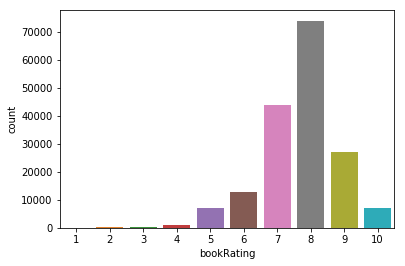

In [478]:
sns.countplot(data=test_data , x='bookRating')
plt.show()


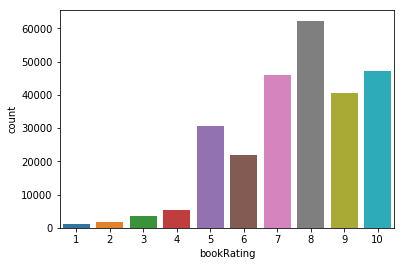

In [215]:
sns.countplot(data=ratings_explicit , x='bookRating')
plt.show()

### 至以上為止 以下無意義還沒整理

In [ ]:
new_users.columns

In [ ]:
print (new_users.shape)
new_users.info()

In [ ]:
plt.plot(new_users.groupby('Age')['bookRating'].mean())

In [ ]:
new_users[new_users['Age']<20].info()

In [ ]:
new_users['Location'].unique().size

In [ ]:
ratings_explicit.info()
ratings_explicit.head()

In [ ]:
counts1

In [ ]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = ratings_explicit.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings

**Training our recommendation system**

**Thanks for reading this notebook**